In [1]:
import pandas as pd
import numpy as np

# Часть 1

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df = df[['Survived', 'Pclass', 'Age', 'Fare']]

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [10]:
X = df[['Pclass', 'Age', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
model.score(X_test, y_test)

0.6713286713286714

In [12]:
predicts = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [13]:
precision_score(y_test, y_pred)

0.6046511627906976

In [14]:
recall_score(y_test, y_pred)

0.4642857142857143

In [15]:
roc_auc_score(y_test, predicts[:, 1])

0.7060755336617406

In [16]:
average_precision_score(y_test, predicts[:, 1])

0.6654794388164886

Данная модель может предсказывать, но не слишком хорошо. Даже по первой метрике accuracy результат нельзя назвать слишком хорошим, но на первый вгляд кажется, что модель нашла закономерность. Однако если мы возьмём метрики precision и recall, то показаетели будут хуже, особено у полноты, что говорит о том, что модель имеет серьёзные проблемы с обнаружением класса 1, и она часто пропускает объекты этого класса. Относительно ROC и PR кривых можно сказать, что модель имеет средение показатели. В итоге модель имеет средние характеристики и серьёзный пробел с пропуском реально выживших.

# Часть 2

In [17]:
df_new = pd.read_csv('train.csv')

In [18]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df_new['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [21]:
df_new['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [22]:
df_new['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
len(df_new['Ticket'].unique())

681

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Признак PassengerID это просто индекс и он не несёт смысловой нагрузки. Признак Ticket категоориальный и у него много значений, при этом особой информации он в этом датасете не несёт, что только в совокупности усожнит работу модели и её точность. Cabin, много пропусков и также неиформативный признак. Если бы этот призак давал информацию о номере палубы, где каюта располагалась был бы полезнее, но это не решает вопрос с проусками. Эти признаки лучше удалить. 

In [25]:
df_new = df_new[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [26]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
len(df_new.dropna()) / len(df_new) #Процент сохранившихся данных при удалении пропусков.

0.7991021324354658

In [29]:
df_new['Embarked'].mode()

0    S
dtype: object

In [30]:
df_new['Embarked'].replace(np.nan, 'S', inplace=True)

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [32]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Для признака Embarked есть смысл взять моду, тем более пропусков всего 2, и это категориальный признак

In [33]:
df_new['Age_Nan'] = np.where(df_new['Age'].isnull(), 1, 0)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Nan
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,NaN,1,2,23.4500,S,1
889,1,1,male,26.0,0,0,30.0000,C,0


In [34]:
df_new['Age'].median()

28.0

In [35]:
df_new['Age'].replace(np.nan, df_new['Age'].median(), inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Age_Nan   891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


<AxesSubplot:>

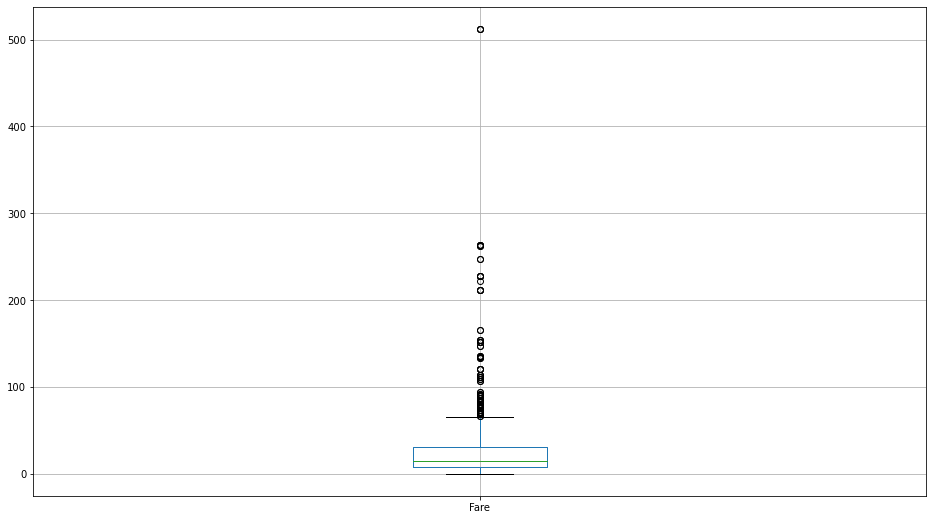

In [36]:
df_new['Fare'].plot(kind='box', figsize=(16, 9), grid=True)

<AxesSubplot:>

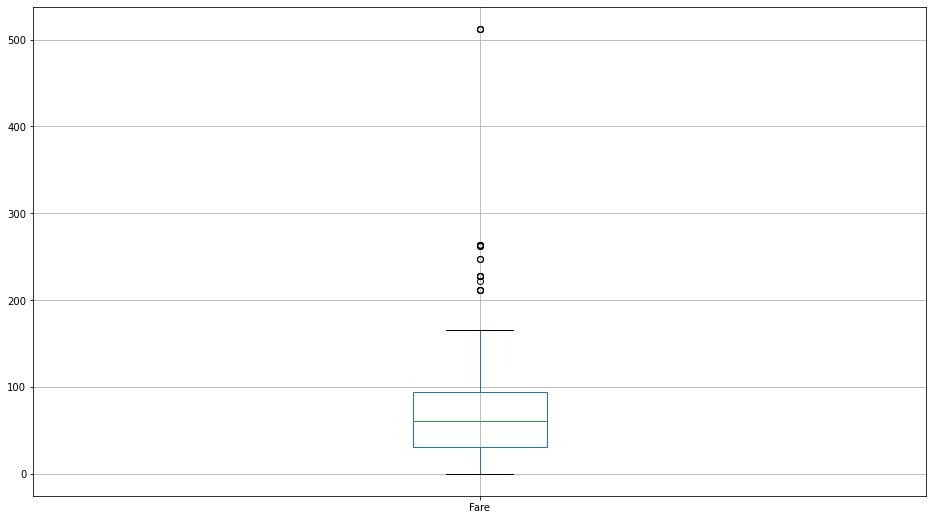

In [37]:
df_new[df_new.Pclass == 1]['Fare'].plot(kind='box', figsize=(16, 9), grid=True)

<AxesSubplot:>

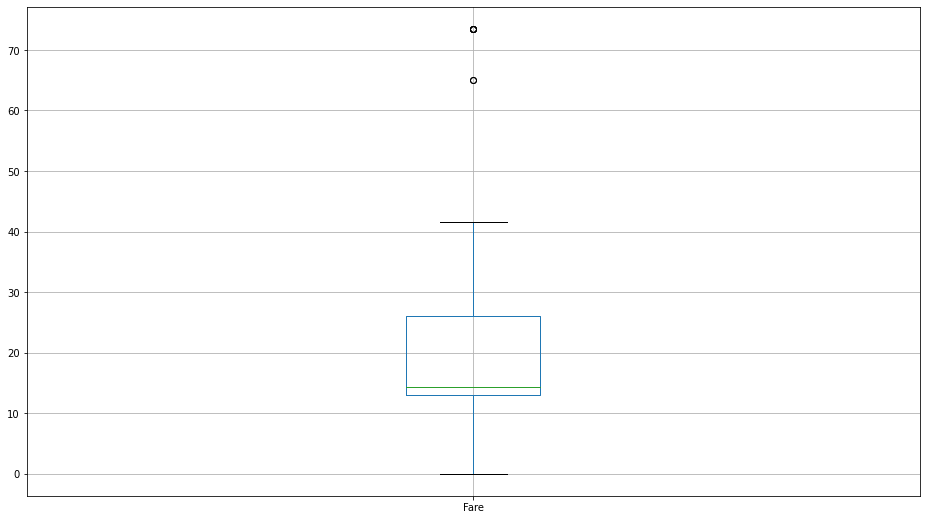

In [38]:
df_new[df_new.Pclass == 2]['Fare'].plot(kind='box', figsize=(16, 9), grid=True)

<AxesSubplot:>

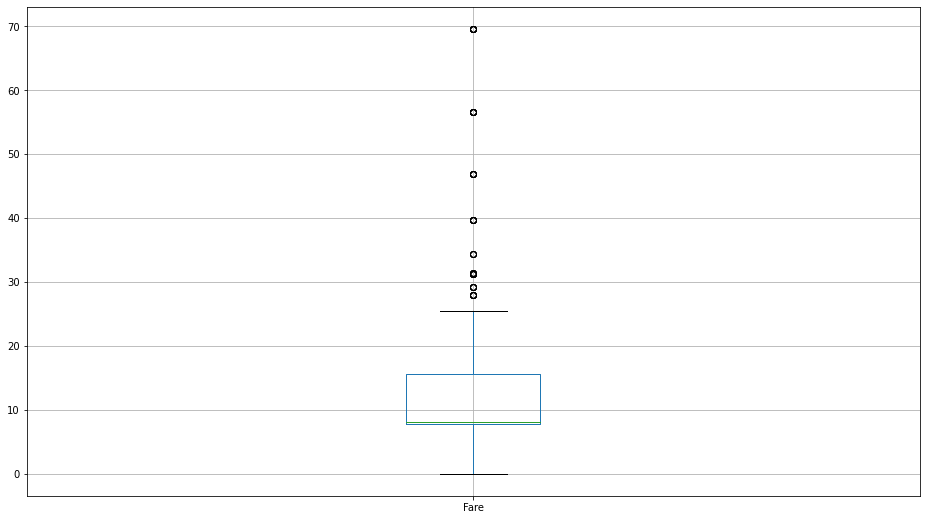

In [39]:
df_new[df_new.Pclass == 3]['Fare'].plot(kind='box', figsize=(16, 9), grid=True)

In [40]:
df_new.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Frequency'>

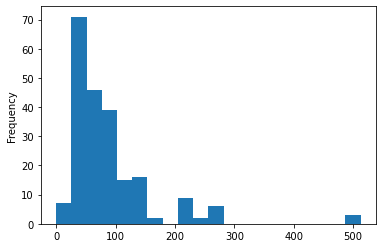

In [41]:
df_new[df_new.Pclass == 1]['Fare'].plot(kind='hist', bins= 20)

<AxesSubplot:ylabel='Frequency'>

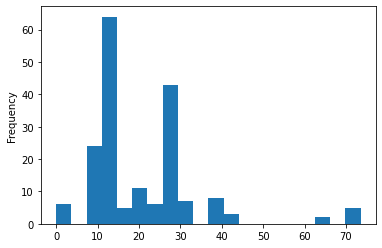

In [42]:
df_new[df_new.Pclass == 2]['Fare'].plot(kind='hist', bins= 20)

<AxesSubplot:ylabel='Frequency'>

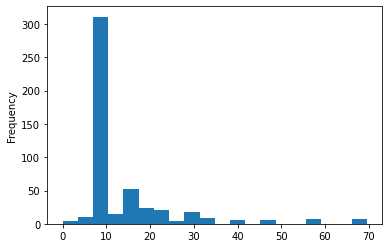

In [43]:
df_new[df_new.Pclass == 3]['Fare'].plot(kind='hist', bins= 20)

In [44]:
df_new.groupby('Pclass')['Fare'].count()

Pclass
1    216
2    184
3    491
Name: Fare, dtype: int64

In [45]:
df_new[(df_new.Pclass == 1) & (df_new.Fare >= 200)].groupby('Parch').count()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Age_Nan
Parch,,,,,,,,
0,8,8,8,8,8,8,8,8
1,5,5,5,5,5,5,5,5
2,6,6,6,6,6,6,6,6
4,1,1,1,1,1,1,1,1


In [46]:
df_new[(df_new.Pclass == 2) & (df_new.Fare >= 42)].groupby('SibSp').count()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Age_Nan
SibSp,,,,,,,,
0,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2
2,3,3,3,3,3,3,3,3


In [47]:
df_new[(df_new.Pclass == 3) & (df_new.Fare >= 26)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Nan
13,0,3,male,39.0,1,5,31.2750,S,0
16,0,3,male,2.0,4,1,29.1250,Q,0
25,1,3,female,38.0,1,5,31.3875,S,0
50,0,3,male,7.0,4,1,39.6875,S,0
59,0,3,male,11.0,5,2,46.9000,S,0
63,0,3,male,4.0,3,2,27.9000,S,0
71,0,3,female,16.0,5,2,46.9000,S,0
74,1,3,male,32.0,0,0,56.4958,S,0
86,0,3,male,16.0,1,3,34.3750,S,0
119,0,3,female,2.0,4,2,31.2750,S,0


<AxesSubplot:ylabel='Frequency'>

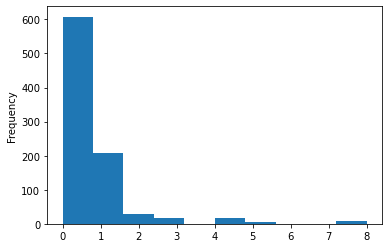

In [48]:
df_new['SibSp'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

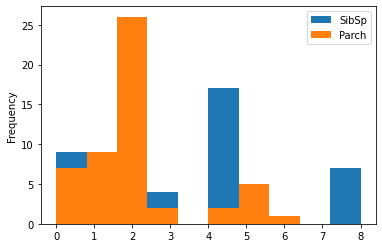

In [49]:
df_new[(df_new.Pclass == 3) & (df_new.Fare >= 26)][['SibSp', 'Parch']].plot(kind='hist', bins=10)

По графику boxplot, можно увидеть выбросы в верхней границе по признаку Fare. Однако более детальное изучение этих выбросов показывает, что люди с такой стоимость проезду очень часто путешествовали не одни, а с большим числом родствеников, детей, супругов, что может обуславливать большую стоимость билетов. Мне кажется, что эти выбросы имеют системный характер и исключать их было бы не совсем правильно.

<AxesSubplot:>

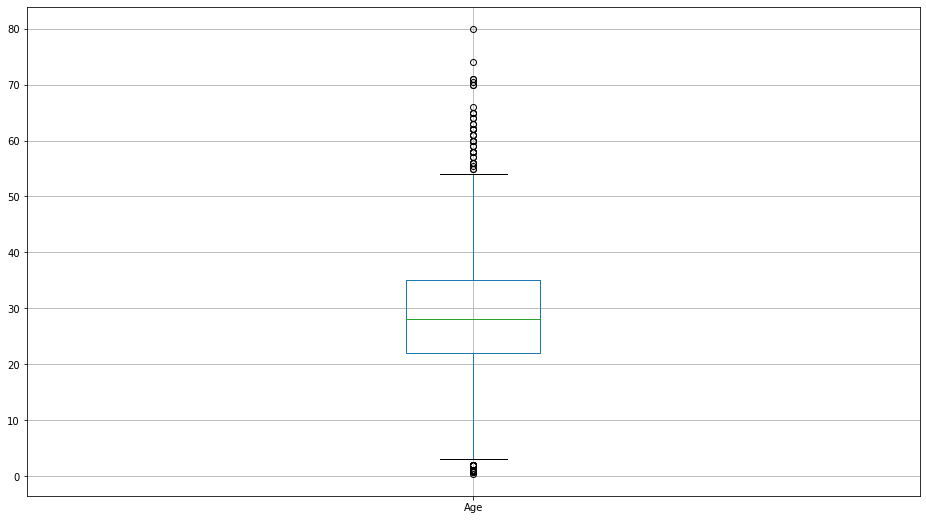

In [50]:
df_new['Age'].plot(kind='box', figsize=(16, 9), grid=True)

Так как на Титанике были дети и пожилые люди, то эти выбросы нет смысла трогать.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

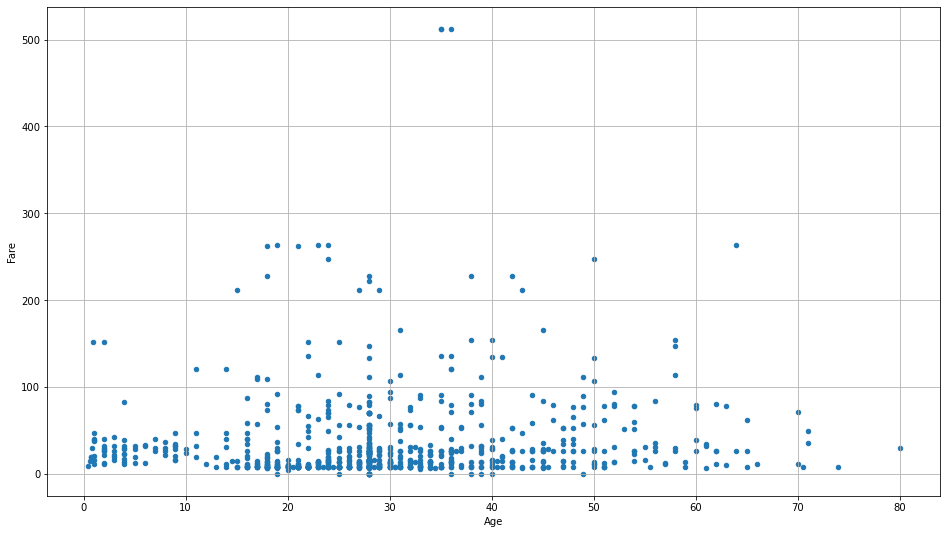

In [51]:
df_new.plot(kind='scatter', x='Age', y='Fare', figsize=(16, 9), grid=True)

In [52]:
df_new[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


Признаки Age и Fare слабо коррелируют.

In [54]:
X = df_new[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_Nan']]

In [55]:
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked'])
X.head()

,Age,Fare,Age_Nan,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [56]:
y = df_new['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
model.score(X_test, y_test)

0.8100558659217877

In [59]:
predicts = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [60]:
precision_score(y_test, y_pred)

0.7941176470588235

In [61]:
recall_score(y_test, y_pred)

0.7297297297297297

In [62]:
roc_auc_score(y_test, predicts[:, 1])

0.87992277992278

In [63]:
average_precision_score(y_test, predicts[:, 1])

0.8659212283539666

In [64]:
df_new.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Nan
Survived,,,,,,,,
0,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342


После отчистки данных, модель стала показывать лучше результаты. Общая точность возрасла на 14%. Более специфичные метрки показали ещё большее улучшение. Модель стала горазду лучше различать классы. Мы можем быть с большой долей вероятности быть уверены, что если модель определила человека как выжевшего, то он действительно выжил. Что касается полноты, то тут есть небольшое проседание по сравнению с другими метриками этой модели, хотя это конечно не сравнится с первым вариантом. Возможно этот дисбаланс с полнотой связан с небольшой несбалнсированстью классов(выживших несколько меньше чем погибших). Возможно эту проблему можно решить передвинув границу определения класса, так как если взять метрику average_precision_score, то она близка к 1, что хороший результат. ROC auc имеет хорошее значение близкое к 1. Таким образом модель с очищенными данными и более полными данными показывает хорошую степень предсказания.

С данными необходимо работать перед обучением модели. Не всегда датасеты имееют хорошее качество. Если не исследовать данные и преобразовать их в случае необходимости, то мы можем получить либо просто плоухую модель, которая не может адекватно предсказывать, либо модель, которая номинально имеет хорошую точность, но не корректно выполняя поставленную задачу, что может только повредить. Что касается больших данных, то их обработка становится сильно затрудненной и тут надо отталкивать от имеющихся технических и временных ресурсов. По хорошему исследовать их стоит, но что касается замены значений или дополнительных колонок, то это может быть сильно затруднено из-за объемов данных. Наверное можно чаще обращаться к удалению порпусков, так как данных много и модель будет иметь их достаточно для обучения. Ественно тут надо смотреть на кокретную ситуацию, и что за модель будет использоваться.